### Name: Sanjana Basu
### Task 2 : Simple Linear Regression model using 1 independent variable only.

______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

Basically a linear regression model using one variable is of the form h_x= mx+c where h_x is popularly known as the hypothesis, m is the coefficient or slope, x is the independent variable and c is the intercept. One way to do this on python is using sklearn which makes model building a one step process and another is to calculate the optimum theta values manually and build the model by creating functions. We will see both here.

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the data

main_data=pd.read_csv('Task2- LR_scores.csv')
main_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Pre-processing

In [3]:
#Check for the datatypes and non-null count

main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#Check for NaN values if any. If there are any, it is best to go for null value imputation rather than dropping the missing data'

main_data.isna().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values to work with

In [5]:
main_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


This is just to get a fair idea of the skewness and the kind of data we are dealing with. Many a times when there is a huge discrepancy in the data, we go ahead and check for outliers, etc. Based on that we normally process the data for eg, normalization, apply log, square root transformation or remove outliers- whichever is convenient.

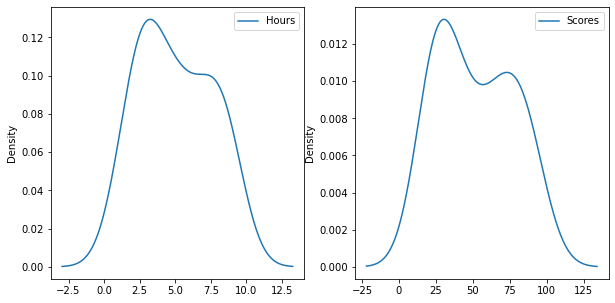

In [6]:
f,ax=plt.subplots(1,2,figsize=(10,5))
main_data.plot(kind='kde',y='Hours',ax=ax[0])
main_data.plot(kind='kde',y='Scores',ax=ax[1])

There is not huge abnormality in the data

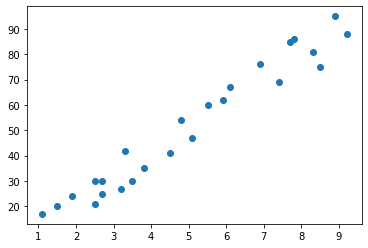

In [7]:
plt.scatter(x='Hours',y='Scores',data=main_data)
plt.show()

Checking an overview of whether there is even a correlation between the two variables or not. Note that this only shows that there is a cause and effect relationship but does not determine the causation.

#### We now have to divide the data into 'attributes' and 'labels'. Attributes are independent variables while labels are dependent variables who's value has to be predicted. In this case, we have to use Hours studied to predict the score of the student.

In [8]:
from sklearn.model_selection import train_test_split
X=main_data.drop('Scores',axis=1)
y=main_data['Scores']


#### Next step is to split the data into train and test- I have split the data into a 70-30 percentage- 70% will be used to train the model and 30% to test the model. test_size variable is what determines the percentage of split.

In [9]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)

In [10]:
len(Xtrain)

17

In [11]:
len(Xtest)

8

#### Next we train the model using the training data Xtrain and ytrain that we made earlier using the in-built train-test function

In [12]:
model= LinearRegression().fit(Xtrain,ytrain)
print('We have now trained the model')

We have now trained the model


In [13]:
print('Model intercept is= ', model.intercept_)
print('Model coefficient is= ', model.coef_[0])

Model intercept is=  2.2138699768265013
Model coefficient is=  9.782546212298127


You can now create the h_x hypothesis as h_x=   9.692626554452957*X + 3.0410878030398223. This is the equation

#### We're now going to use the remaining or the test set of data that we have from the split and plug it into the model. I have used variable y_prediction to store all the predicted values.

In [14]:
y_prediction=model.predict(Xtest)
y_prediction=pd.DataFrame(y_prediction)
y_prediction

,0
0,34.496272
1,83.409004
2,28.626745
3,61.887402
4,56.017874
5,52.104856
6,39.387546
7,49.170092


In [15]:
ytest=ytest.reset_index()

#### Now comparing the actual values to the model predicted values. I have displayed all of the test values here because of the size of the dataset. In cases of huge datasets, you can choose to display the first n rows or represent it on a bar graph.

In [16]:
Compare=pd.concat([ytest['Scores'],y_prediction],axis=1).rename(columns={'Scores':'Actual',0:'Predicted'})
Compare

,Actual,Predicted
0,42,34.496272
1,81,83.409004
2,25,28.626745
3,67,61.887402
4,60,56.017874
5,47,52.104856
6,35,39.387546
7,54,49.170092


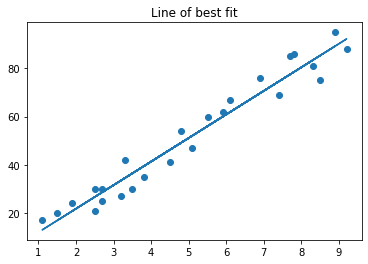

In [17]:
plt.figure
plt.scatter(X,y)
plt.plot(X,(model.coef_[0]*X+ model.intercept_))
plt.title('Line of best fit')
plt.show()

In [18]:
question=np.array(9.25)
solution= model.predict(question.reshape(1,-1))
print('The predicted score as per the model for a student studying 9.25 hours per day is = ',solution[0].round(),'approximately')

The predicted score as per the model for a student studying 9.25 hours per day is =  93.0 approximately


_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

### Prediction using simple linear regression without sklearn

Baiscally involves calculation of optimum theta using gradient descent,calculation of cost using cost function and calculation of hypothesis for value X. 

We first convert the dataframes into matrices for the sake of vectorization and perform all necessary calculations among vectors. This skips the use of loops. The only place a while loop is used is for gradient descent because we have to run the formula under n number of iterations to attain global minimum.

We add a column of ones to X train because our count of theta is always m+1 for m features. We start with theta 0 insread of theta 1 for calculation of intercept.

In [19]:
X1=Xtrain.values.reshape(-1,1)
ones= np.ones([X1.shape[0],1])
X1= np.concatenate([ones,X1],1)
y1=ytrain.values.reshape(-1,1)

#### Hypothesis function

In [20]:
def h_x(theta, X1):
    return theta[0][0]+ theta[0][1]* X1

#### Cost function

In [21]:
def J_cost(theta, X1, y1 ):
    return 1/(2*m) * np.sum( (X1@ np.transpose(theta) - (y1))**2)

#### Gradient Descent function

In [22]:
m= len(X1)

def gradient_descent(theta, X1, y1, num_iter, alpha):
    
    cost= []
    i=0
    
    while i< num_iter:
        hx= h_x(theta, X1)
       
        theta -= (alpha/m) * np.sum((X1 @ np.transpose(theta) -y1)* X1, axis=0)[1]
        cost.append(J_cost(theta, X1, y1))
        
        i+=1
        
        return (theta, cost)
        

#### Predict function

In [23]:
def predict(theta, X1, y1, num_iter, alpha):
    
    theta, cost= gradient_descent(theta, X1, y1, num_iter, alpha)
    
    return h_x(theta, X1), cost, theta

#### Enter parameters with a calculated guess

The alpha and number of itereations and the initial theta value can be experimented and played around with till it suits the data and the line of best fit can be obtained.

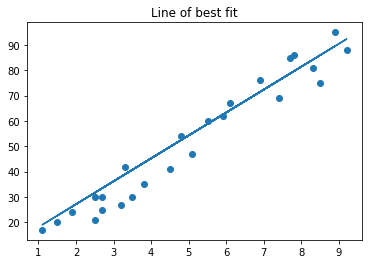

In [35]:
theta=[[0,0]]
num_iter=1000
alpha= 0.027
y_predict, cost, theta= predict(theta, X1, y1, num_iter, alpha)

plt.figure
plt.scatter(X,y)
plt.plot(X,theta[0][0]+theta[0][1]*X)
plt.title('Line of best fit')
plt.show()

#### Final prediction as per the question, hours of study= 9.25 

In [36]:
final_score= h_x(theta,9.25)
print('The predicted score as per the model for a student studying 9.25 hours per day is = ',final_score.round(),'approximately')

The predicted score as per the model for a student studying 9.25 hours per day is =  93.0 approximately


## THANK YOU